In [1]:
#data format library
import h5py
#numpy
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
# %matplotlib notebook
from sklearn.cluster import KMeans

import sys
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as colors
import os
from scipy.integrate import odeint
sys.path.append('../utils/')
import operator_calculations as op_calc
import stats


In [2]:
f = h5py.File('simulations/simulation_Kantz.h5','r')
sim = np.array(f['simulation'])
T = np.array(f['MetaData/T'])[0]
discard_t = np.array(f['MetaData/discard_t'])[0]
theta = np.array(f['MetaData/theta'])
f.close()

In [4]:
f = h5py.File('cluster_results/Kantz_combined_results.h5','r')
K_range = np.array(f['K_range'])
eps_range = np.array(f['eps_range'])
n_samples = np.array(f['n_samples'])
prob_K_eps = np.array(f['probs'])
H_K_eps = np.array(f['entropies'])
f.close()

In [5]:
H_K_eps.shape

(9, 21, 100)

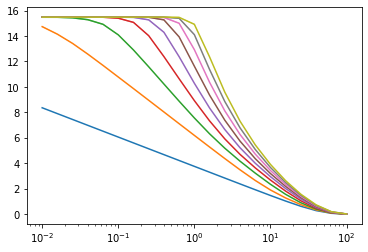

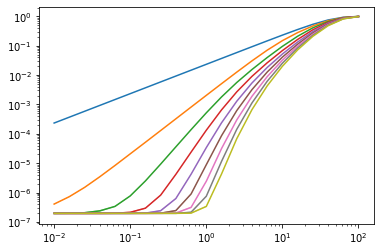

In [6]:
for k,K in enumerate(K_range):
    mean,cil,ciu = stats.bootstrap(H_K_eps[k,:].T,n_times=100)
    plt.plot(eps_range,mean)
    plt.fill_between(eps_range,cil,ciu,alpha=.5)
plt.xscale('log')
plt.show()


for k,K in enumerate(K_range):
    mean,cil,ciu = stats.bootstrap(prob_K_eps[k,:].T,n_times=100)
    plt.plot(eps_range,mean)
    plt.fill_between(eps_range,cil,ciu,alpha=.5)
plt.xscale('log')
plt.yscale('log')
plt.show()

In [7]:
H_K_eps = np.mean(H_K_eps,axis=2)
prob_K_eps = np.mean(prob_K_eps,axis=2)

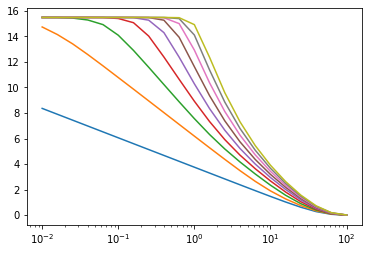

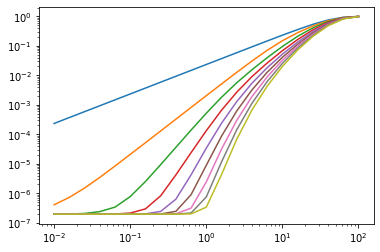

In [8]:
for k,K in enumerate(K_range):
    plt.plot(eps_range,H_K_eps[k,:])
plt.xscale('log')
plt.show()


for k,K in enumerate(K_range):
    plt.plot(eps_range,prob_K_eps[k,:])
plt.xscale('log')
plt.yscale('log')
plt.show()

In [9]:
h_K_eps = np.zeros(((len(K_range)-1),len(eps_range)))
for k,K in enumerate(K_range[:-1]):
    h_K_eps[k,:] = H_K_eps[k+1,:]-H_K_eps[k,:]


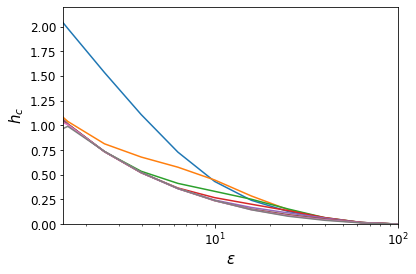

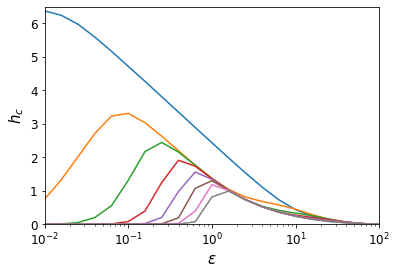

In [10]:
plt.plot(eps_range,h_K_eps.T)
plt.xscale('log')
plt.xlim(1.5,eps_range[-1])
plt.ylim(0,2.2)
plt.xlabel('$\epsilon$',fontsize=15)
plt.ylabel('$h_c$',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.savefig('h_c_zoom.pdf')
plt.show()
plt.plot(eps_range,h_K_eps.T)
plt.xscale('log')
plt.xlim(eps_range[0],eps_range[-1])
# plt.ylim(0,3)
plt.xlabel('$\epsilon$',fontsize=15)
plt.ylabel('$h_c$',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0,6.5)
# plt.savefig('h_c_all.pdf')
plt.show()


Redundancy/predictive information should become constant as a function of epsilon for a stochastic system, unlike deterministic chaotic system for which predictive information always grows with decreasing length scales. However, observing the length scale regime for which the predictive information is constant is hard in an applied sense

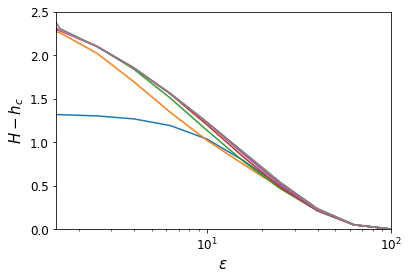

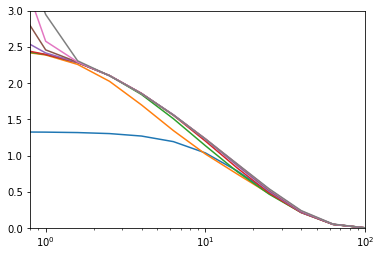

In [11]:
plt.plot(eps_range,(H_K_eps[0,:]-h_K_eps).T)
plt.xscale('log')
plt.xlim(1.5,eps_range[-1])
plt.ylim(0,2.5)
plt.xlabel('$\epsilon$',fontsize=15)
plt.ylabel('$H-h_c$',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.savefig('Ipred_hc.pdf')
plt.show()


plt.plot(eps_range,(H_K_eps[:1]-h_K_eps).T)
plt.xscale('log')
plt.xlim(.8,eps_range[-1])
plt.ylim(0,3)
plt.show()

In [12]:
f = h5py.File('cluster_results/partition_combined_results.h5','r')
K_range = np.array(f['K_range'])
seed_range = np.array(f['seed_range'])
n_samples = np.array(f['n_samples'])
prob_K_s = np.array(f['probs'])
H_K_s = np.array(f['entropies'])
h_K_s = np.array(f['entropy_rates'])
Ipred_K_s = np.array(f['Ipreds'])
eps_K_s = np.array(f['eps_scale'])
f.close()

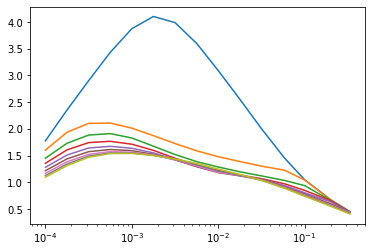

In [13]:
for k,K in enumerate(K_range):
    mean,cil,ciu = stats.bootstrap(h_K_s[k,:].T,n_times=100)
    plt.plot(1/seed_range,mean)
    plt.fill_between(1/seed_range,cil,ciu,alpha=.5)
plt.xscale('log')
plt.show()



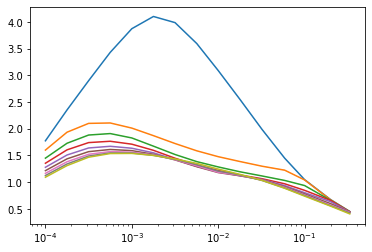

In [14]:
for k,K in enumerate(K_range):
    mean,cil,ciu = stats.bootstrap(h_K_s[k,:].T,n_times=100)
    plt.plot(1/seed_range,mean)
    plt.fill_between(1/seed_range,cil,ciu,alpha=.5)
plt.xscale('log')
plt.show()



In [15]:
h_K_s = np.mean(h_K_s,axis=2)[:8,:]
H_K_s = np.mean(H_K_s,axis=2)[:8,:]
Ipred_K_s = np.mean(Ipred_K_s,axis=2)[:8,:]
eps_K_s = np.mean(eps_K_s,axis=2)[:8,:]

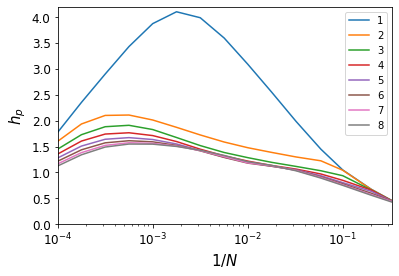

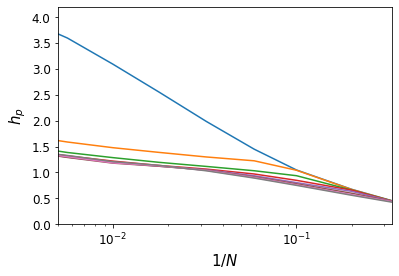

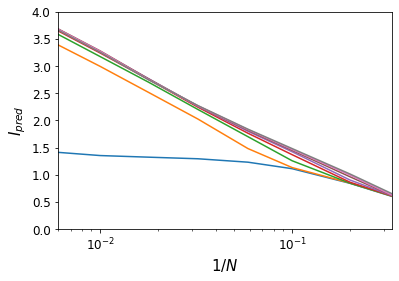

In [16]:
for k,K in enumerate(K_range[:8]):
    plt.plot(1/seed_range,h_K_s[k,:],label=str(int(K)))
plt.xscale('log')
plt.xlabel('$1/N$',fontsize=15)
plt.ylabel('$h_p$',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(1/seed_range[-1],1/seed_range[0])
plt.ylim(0,4.2)
plt.legend()
# plt.savefig('h_p_AR.pdf')
plt.show()

plt.plot(1/seed_range,h_K_s.T)
plt.xscale('log')
plt.xlabel('$1/N$',fontsize=15)
plt.ylabel('$h_p$',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(5e-3,1/seed_range[0])
plt.ylim(0,4.2)

# plt.savefig('h_p_AR_zoom.pdf')
plt.show()

plt.plot(1/seed_range,Ipred_K_s.T)
plt.xscale('log')
plt.xlabel('$1/N$',fontsize=15)
plt.ylabel('$I_{pred}$',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(6e-3,1/seed_range[0])
plt.ylim(0,4)
# plt.savefig('Ipred_AR.pdf')
plt.show()

# plt.plot(1/seed_range,(H_K_s[0,:]-h_K_s).T)
# plt.xscale('log')
# plt.show()

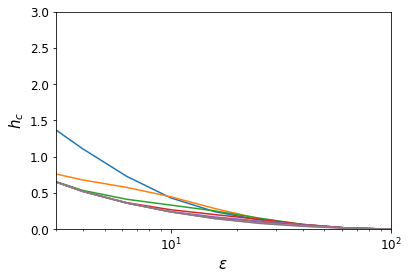

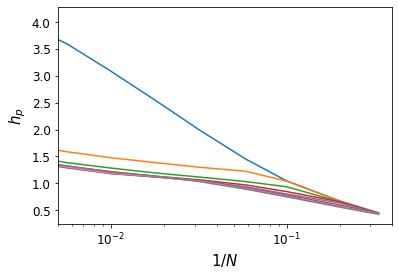

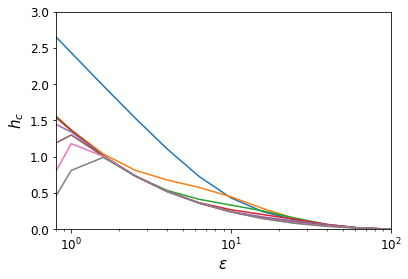

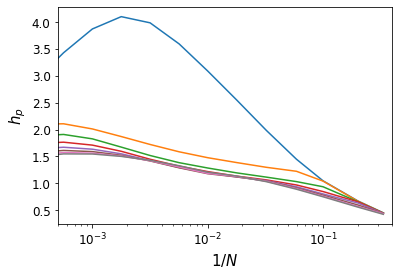

In [17]:
plt.plot(eps_range,h_K_eps.T)
plt.xscale('log')
plt.xlim(3,eps_range[-1])
plt.ylim(0,3)
plt.xlabel('$\epsilon$',fontsize=15)
plt.ylabel('$h_c$',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
plt.plot(1/seed_range,h_K_s.T)
plt.xscale('log')
plt.xlim(5e-3,4e-1)
plt.xlabel('$1/N$',fontsize=15)
plt.ylabel('$h_p$',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

plt.plot(eps_range,h_K_eps.T)
plt.xscale('log')
plt.xlim(.8,eps_range[-1])
plt.ylim(0,3)
plt.xlabel('$\epsilon$',fontsize=15)
plt.ylabel('$h_c$',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
plt.plot(1/seed_range,h_K_s.T)
plt.xscale('log')
plt.xlim(5e-4,4e-1)
plt.xlabel('$1/N$',fontsize=15)
plt.ylabel('$h_p$',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()